[0.23214552]


/var/folders/fg/w2t7p9sx1_s43rj6b6h5mdqw0000gn/T/ipykernel_10147/4273813325.py:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpio" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('Root Find.jpeg',dpio=300,bbox_inches='tight') #save figure as a *jpeg


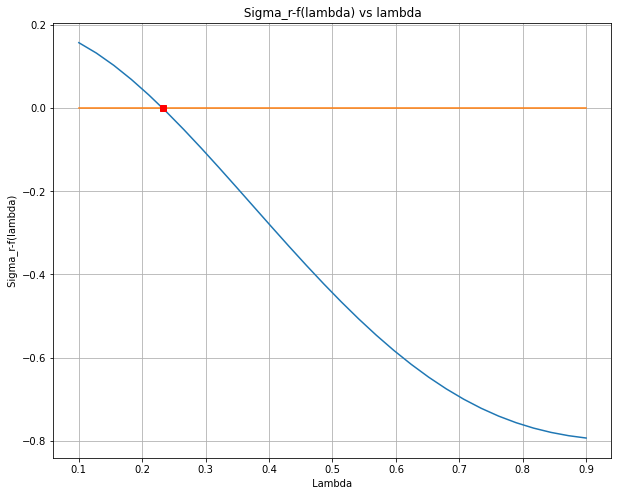

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve 
#
#
a = 100.0 #solute radius in nm
sigmar = 0.2 #fraction reflected 
guess = 0.9 #guess 
sigfigs = 3
# 
def g(x): #define a function of g 
    kpore = (1-x)**2 #define kpore 
    term3 = 1 -(2/3)*x**2-0.163*x**3 #define term 3 
    y = sigmar - (1-kpore*(2-kpore)*term3) #create your function 
    return y
#
x_root = fsolve(g,guess) #solve for root with built in method 
rpore = a/x_root #solve for pore radius 
y_guess = g(guess) #solve for y value of root 

result_dictonary = {'x values':[guess,x_root],'g(lambda)':[]} #create a data frame of the results 

#print("The value for lambda =: %7.3f , for a sigma_r of: %7.3f" % (x_root,sigmar))
#print("The pore radius =: %.*e nm" %(sigfigs-1,rpore)
print(x_root)
x = np.linspace(0.1,0.9,30) #set up an x axis 
#
fig= plt.figure(figsize=(10,8)) #create a figure size 
plt.plot(x,g(x)) #plot the function
plt.plot(x,np.zeros(len(x))) #plot a line at zero 
plt.grid(True) #add a grid 
plt.plot(x_root, g(x_root), 'rs') #plot the root 
plt.title(" Sigma_r-f(lambda) vs lambda ") #create title 
plt.xlabel(' Lambda ') #label x axis 
plt.ylabel(' Sigma_r-f(lambda) ') #label y axis 
fig.savefig('Root Find.jpeg',dpio=300,bbox_inches='tight') #save figure as a *jpeg

convergence 385.898
convergence 0.993
convergence 0.512
convergence 0.012
convergence 0.000


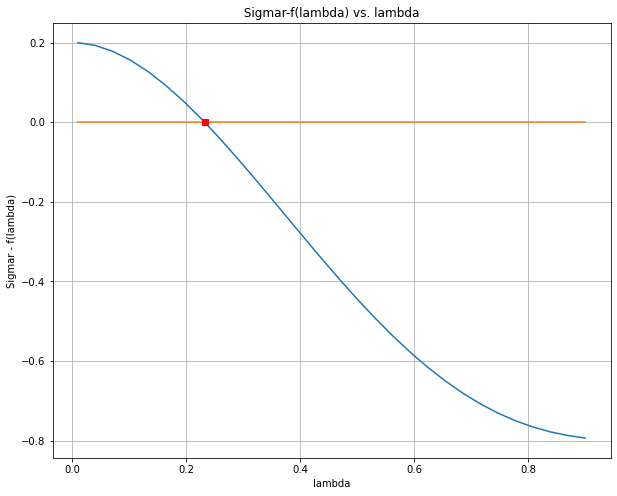

In [44]:
# Del Squared Method

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci
import math
from scipy.optimize import fsolve


# Define Global Variables

sigmar = 0.2
a = 100.0 #nm
x0 = 0.9
sigfig = 3
epsilon = 0.0001
count = 1
tol = 10
rpore0 = a/x0

#create lists 
L_count = []
R_pore = []
L_count_pore = []
Tols= []
i_list = []

def g(x): #define g(x) and its variables for lambda 
    kpore = (1-x)**2
    term3 = 1 -(2/3)*x**2-0.163*x**3
    z = 1-((1-sigmar)/((2-kpore)*(term3)))**(1/2)
    return z

 

def gprim(y0,y1,y2): #define g prime 
    return (y2-y1)/(y1-y0)

def g1(z): #define function of g 
    kpore = (1-z)**2
    term3 = 1 - (2/3)*z**2 - 0.163*z**3
    yp = sigmar - (1-kpore*((2-kpore)*term3))
    return yp 
 

while tol > epsilon: #create a loop to iterate guessing values 
    x1 = g(x0)     #define guess 1 
    x2 = g(x1)     #define 
    gp = gprim(x0,x1,x2) #set g prime to a variable 
    xdel = x2 + (gp/(1-gp))*(x2-x1) #define x del squared values 
    tol = abs((xdel-x0)/xdel) #calculate a tolerance 
    print(f'convergence {tol:.3f}')
    x0 = xdel
    Rpore = a/xdel
    R_pore.append('%.*e' % (sigfig-1,Rpore)) #append rpore list with values 
    L_count.append('%d' % (count)) #append count list with values
    L_count_pore.append('%d %.*e' % (count, sigfig-1,Rpore)) #append l count with r pore values
    Tols.append('%.*f' % (4,tol))
    count += 1 # keep the count moving upwards 

df = pd.DataFrame({"Pore Radius [nm]":R_pore, #create a dataframe of values 

                   "Iteration": L_count,

                   "Tolerance": Tols})
  

x = np.linspace(0.01,0.9,30) #create a linspace of x values 


fig = plt.figure(figsize = (10,8)) #set-up figure
plt.plot(x,g1(x)) #plot g function
plt.plot(x,np.zeros(len(x))) #plot line of zeros 
plt.plot(xdel,g1(x0), 'rs' )
plt.grid(True) #add grid
plt.title(" Sigmar-f(lambda) vs. lambda ") #create title 
plt.xlabel("lambda") #label x axis 
plt.ylabel("Sigmar - f(lambda)") #label y axis
fig.savefig('Del_Squared_plot.jpeg', dpi=300, bbox_inches='tight') #save figure to jpeg 

with open('Del_Squared.csv','w',) as f: #write datarame tables to csv file
        df.to_csv(f)
        f.write("\n")



